### Import libraries

In [2]:
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

### Load Data

In [6]:
df = pd.read_csv('file1.csv')

In [7]:
df.head()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


In [8]:
df.shape

(511, 10)

- The dataset has 10 features and 511 observation

In [9]:
# Checking are datatype of the attribute
df.dtypes

Application_ID        object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
Credit_History         int64
Property_Area         object
Income                object
Application_Status    object
dtype: object

In [10]:
df[df.duplicated()]

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status


- No Duplicates in the Data set

### Missing Value

In [11]:
Total = df.isnull().sum().sort_values(ascending=False) 
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
Application_Status,0,0.0
Income,0,0.0
Property_Area,0,0.0
Credit_History,0,0.0
Self_Employed,0,0.0
Education,0,0.0
Dependents,0,0.0
Married,0,0.0
Gender,0,0.0
Application_ID,0,0.0


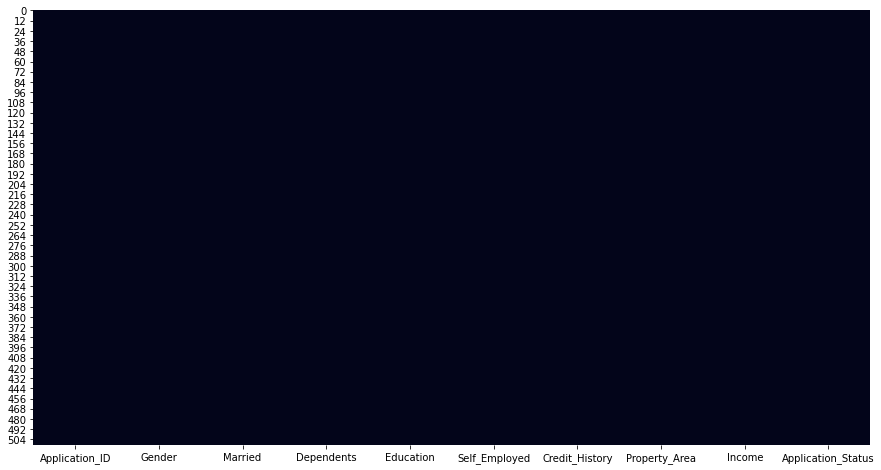

In [12]:
plt.figure(figsize=(15, 8))
# plot heatmap to check null values
# isnull(): returns 'True' for a missing value
# cbar: specifies whether to draw a colorbar; draws the colorbar for 'True'

sns.heatmap(df.isnull(), cbar=False)
# display the plot
plt.show()

- The Dataset has no Missing value

### Removing Insignificant Variable

In [13]:
df=df.drop(['Application_ID'],1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,Male,No,0,Graduate,No,1,Urban,medium,Y
1,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,Male,No,0,Graduate,No,1,Urban,medium,Y


In [14]:
# changing the data type of Dependents from object to numerical
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [21]:
df.Dependents.nunique()

4

- There are 4 unique values in Dependents

In [213]:
dependent_per =  ((df.groupby('Dependents')['Dependents'].count())/len(df))*100
dependent_per

Dependents
0    57.534247
1    16.634051
2    17.221135
3     8.610568
Name: Dependents, dtype: float64

- 57.5% of Applicants has 0 dependent
- 16.6% of Applicants has 1 dependent
- 17.2% of Applicants has 2 dependents
- 8.6% of Applicants has 3 dependents
 
    - Most of the aApplicants has 0 Dependents

In [214]:
df.Dependents.mean()

0.7690802348336595

- most of the applicant has 0.76 as mean that is closer to 1 implies that most of the applicants has 1 dependent

In [215]:
sfe_p=df[(df['Self_Employed']== 'Yes') & (df['Application_Status']== 'Y')]

In [216]:
(sfe_p.shape[0]/511)*100

9.001956947162427

- 9% applications approved were self employed

In [217]:
gm_p=df[(df['Gender']== 'Male') & (df['Married']== 'Yes')& (df['Application_Status']== 'N')]

In [218]:
(gm_p.shape[0]/511)*100

17.025440313111545

- 17% of the applications rejected were of Male and were married

In [219]:
df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [220]:
pu=df[(df['Property_Area']== 'Urban') & (df['Application_Status']== 'Y')]
(pu.shape[0]/511)*100

20.352250489236788

- 20% of the application approved are from urban area

In [221]:
pr=df[(df['Property_Area']== 'Rural') & (df['Application_Status']== 'Y')]
(pr.shape[0]/511)*100

17.61252446183953

- 17.6% of the application approved are from rural area

In [222]:
ps=df[(df['Property_Area']== 'Semiurban') & (df['Application_Status']== 'Y') ]
(ps.shape[0]/511)*100

29.9412915851272

- 29.9% of the application approved are from Semi urban area

- Semi urban area has maximum approvals as compared to urban and rural.

In [ ]:
Find following 3 values for each unique combination of the Property are and Married status :
1) number of selected candidates
2) number  of rejected applicant

In [9]:
# Property and married 
df.groupby(['Property_Area','Married'])['Application_Status'].count()

Property_Area  Married
Rural          No          56
               Yes         93
Semiurban      No          68
               Yes        129
Urban          No          56
               Yes        109
Name: Application_Status, dtype: int64

In [18]:
df.groupby(['Property_Area','Married','Application_Status'])['Application_Status'].count()

Property_Area  Married  Application_Status
Rural          No       N                      22
                        Y                      34
               Yes      N                      37
                        Y                      56
Semiurban      No       N                      21
                        Y                      47
               Yes      N                      23
                        Y                     106
Urban          No       N                      26
                        Y                      30
               Yes      N                      35
                        Y                      74
Name: Application_Status, dtype: int64

In [16]:
# Urban
# 74 applicants selected under urban area and are married
# 30 not married
# not married not selected 26
#  married not selected 35

# semi urban
# # 106 applicants selected under semi urban area and are married
# 47 not married
# not married not selected 21
#  married not selected 23

In [15]:
sel=df[(df['Property_Area']== 'Urban')& (df['Married']== 'Yes') & (df['Application_Status']== 'Y')]
sel.shape

(74, 10)

In [223]:
df.groupby(['Income'])['Dependents'].mean()

Income
high      0.888889
low       0.641026
medium    0.922280
Name: Dependents, dtype: float64

- For high income the average dependent is 0.88
- low income has the average dependent as 0.64
- medium income has the average dependent as 0.92

- Medium income group has the maximum average dependent

In [224]:
# converting Categorical data to numerical
df.Gender=df.Gender.map({'Male':0,'Female':1})
df.Married=df.Married.map({'Yes':1,'No':0})
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df.Income=df.Income.map({'low':0,'medium':1,'high':2})

In [225]:
df_numeric_features = df.select_dtypes(include=np.number)
# print the names of the numeric variables 
df_numeric_features.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Income'],
      dtype='object')

In [226]:
corr =  df_numeric_features.corr()

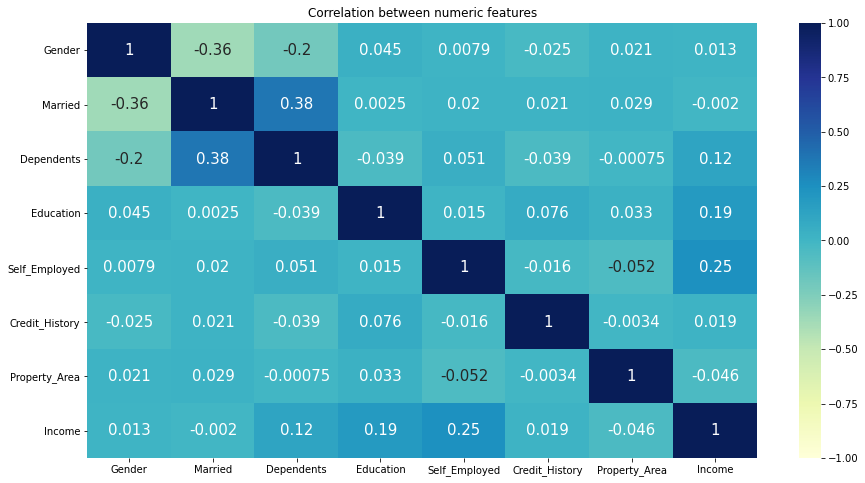

In [227]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15}, )

plt.title('Correlation between numeric features')
plt.show()

- There is no correlation between the numerical variable

In [229]:
# numerical data
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income
count,511.000000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.178082,0.64775,0.769080,0.784736,0.136986,0.843444,1.031311,0.553816
std,0.382957,0.47814,1.020142,0.411408,0.344170,0.363738,0.784031,0.651198
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,1.00000,2.000000,1.000000,0.000000,1.000000,2.000000,1.000000
max,1.000000,1.00000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000


In [230]:
df.describe(include=object)

,Application_Status
count,511
unique,2
top,Y
freq,347


#### Encoding

In [231]:
df1=pd.get_dummies(df,drop_first=True)
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status_Y
0,0,0,0,1,0,1,2,1,1
1,0,1,1,1,0,1,0,1,0
2,0,1,0,1,1,1,2,0,1
3,0,1,0,0,0,1,2,0,1
4,0,0,0,1,0,1,2,1,1


- Target variable Application_Status_Y encoded 1 for yes and 0 for no

- scaling is not performed as the data doesn't have much variation

### Train Test split

In [234]:
X = df1.drop(columns='Application_Status_Y')
y = df1['Application_Status_Y']

In [235]:
# train_test_split
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state =10)

In [236]:
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (357, 8)
y_train (357,)
X_test (154, 8)
y_test (154,)


### Logistic Regression model

In [237]:
log_reg_full = sm.Logit(y_train,X_train).fit()
# summary
print(log_reg_full.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
                            Logit Regression Results                            
Dep. Variable:     Application_Status_Y   No. Observations:                  357
Model:                            Logit   Df Residuals:                      349
Method:                             MLE   Df Model:                            7
Date:                  Mon, 20 Dec 2021   Pseudo R-squ.:                     inf
Time:                          23:23:27   Log-Likelihood:                   -inf
converged:                         True   LL-Null:                        0.0000
Covariance Type:              nonrobust   LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Gender            -0.6510      0.341     -1.908      0.056      -1.320       0.018
Marrie

In [238]:
y_pred_prob = log_reg_full.predict(X_test)

In [239]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
y_pred[0:5]

[1, 1, 1, 1, 1]

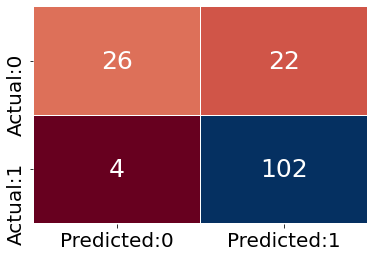

In [240]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [241]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Logistic Regression model is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Logistic Regression model is:  0.8311688311688312


### Decision tree

In [242]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [243]:
decision_tree_classification = DecisionTreeClassifier(max_leaf_nodes= 5,criterion = 'gini', random_state = 10)
decision_tree = decision_tree_classification.fit(X_train, y_train)

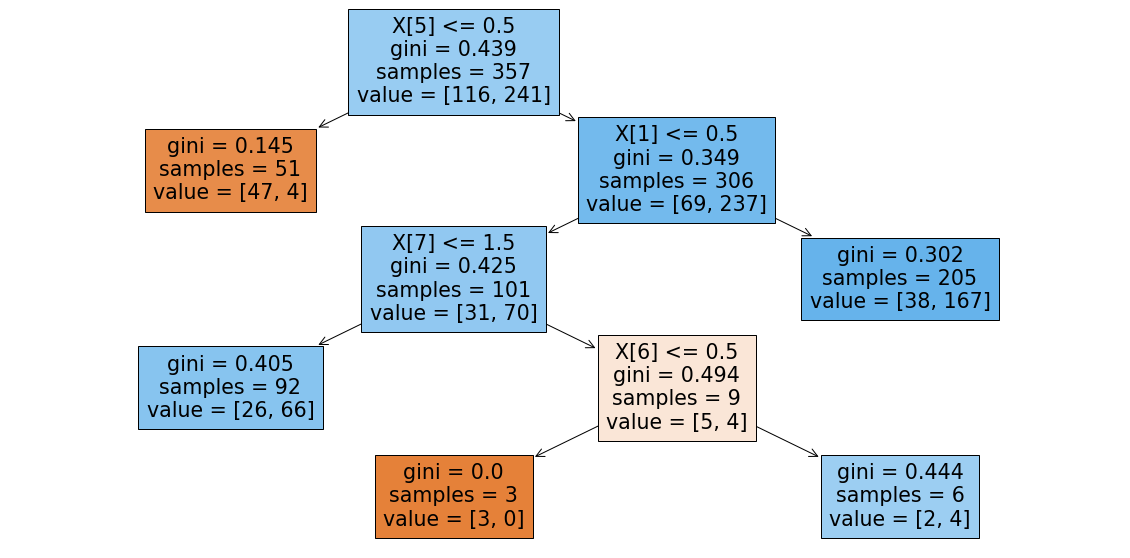

In [244]:
plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree,filled=True)
plt.show()

In [245]:
y_pred = decision_tree.predict(X_test)

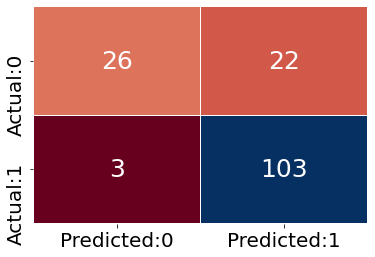

In [246]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [247]:
print('The accuracy of Decision Tree model is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Decision Tree model is:  0.8376623376623377


### Random Forest grid Search

In [248]:
from sklearn.model_selection import GridSearchCV

In [249]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'min_samples_split': [2, 5, 8, 11],
                     }]
 
random_forest_classification = RandomForestClassifier(random_state = 10)


rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(X_train, y_train)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 11, 'n_estimators': 70} 



In [256]:
rf_classification_t = RandomForestClassifier(n_estimators=70,max_depth=10,min_samples_leaf = 8,criterion='entropy',min_samples_split=11)
rf_model_tuned = rf_classification_t.fit(X_train, y_train)

In [257]:
y_pred = rf_classification_t.predict(X_test)

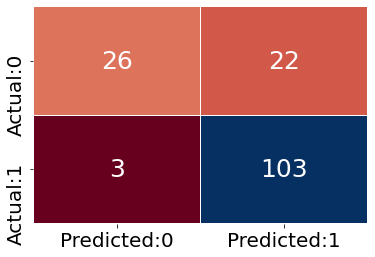

In [258]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [259]:
from sklearn import metrics
print('The accuracy of Random Forest model with tuned parameter is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Random Forest model with tuned parameter is:  0.8376623376623377


- Since the models decision tree and  grid search random forest has same accuracy I will consider Random forest with best parameters for prediction

### Predictions

In [261]:
data1 = [[0,0,0,1,0,1,2,1]]
pred = rf_model_tuned.predict(data1)
pred

array([1], dtype=uint8)

- predicting for the given data the loan is approved

In [263]:
data2 = [[1,0,0,1,1,0,1,1]]
pred = rf_model_tuned.predict(data2)
pred

array([0], dtype=uint8)

- predicting for the given data the loan is not approved